In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Read in 3 components of the seismogram

In [2]:
rad = np.genfromtxt('../Data/2002.321.full.r.asc')
tan = np.genfromtxt('../Data/2002.321.full.t.asc')
ver = np.genfromtxt('../Data/2002.321.full.z.asc')

The direct P-wave arrives between 500 and 550s, extract time information and plot three components in that time interval.

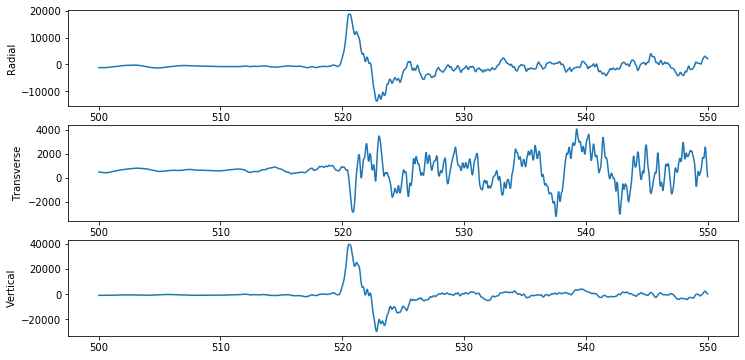

In [3]:
time = rad[:,0]
ind = (time > 500) & (time < 550)

f= plt.figure(figsize=(12,6))
f.add_subplot(311)
plt.plot(time[ind],rad[ind,1])
plt.ylabel("Radial")
f.add_subplot(312)
plt.plot(time[ind],tan[ind,1])
plt.ylabel("Transverse")
f.add_subplot(313)
plt.plot(time[ind],ver[ind,1])
plt.ylabel("Vertical")
plt.savefig('seismo.pdf')
plt.show()

Write components into a single matrix and perform SVD

In [4]:
X = np.vstack([rad[ind,1],tan[ind,1],ver[ind,1]]).T
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

Use sklearn PCA class to do the same thing and compare some outputs

In [5]:
p = PCA()
p.fit(X_centered)
print(p.explained_variance_ratio_)
print(s**2/np.sum(s**2))

print(Vt)
print(p.components_)

[0.95865971 0.02819811 0.01314218]
[0.95865971 0.02819811 0.01314218]
[[ 0.43237846 -0.01509573  0.90156585]
 [-0.65864198  0.67758188  0.32722091]
 [-0.61582433 -0.7352924   0.28302913]]
[[ 0.43237846 -0.01509573  0.90156585]
 [ 0.65864198 -0.67758188 -0.32722091]
 [-0.61582433 -0.7352924   0.28302913]]


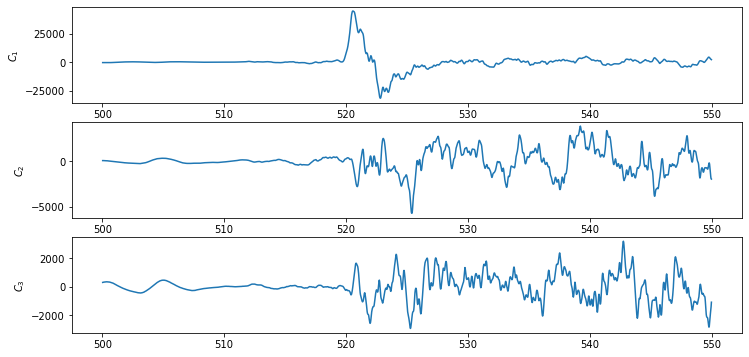

In [6]:
recov = X.dot(Vt.T[:,0])
f=plt.figure(figsize=(12,6))
f.add_subplot(311)
plt.plot(time[ind],X_centered.dot(Vt.T[:,0]))
plt.ylabel(r"$C_1$")
f.add_subplot(312)
plt.plot(time[ind],X_centered.dot(Vt.T[:,1]))
plt.ylabel(r"$C_2$")
f.add_subplot(313)
plt.plot(time[ind],X_centered.dot(Vt.T[:,2]))
plt.ylabel(r"$C_3$")
plt.savefig('seismo_pca.pdf')
plt.show()